___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Data Wrangling

In [ ]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [ ]:
# Count the number of unique values
df.nunique()

Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [ ]:
# Count the number of nulls values
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
# drop all null values
df.dropna(inplace=True)
# reseat the index after droping null values
df.reset_index(drop=True, inplace=True)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
# Check for the missing values
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [ ]:
sum(df.duplicated())

0

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

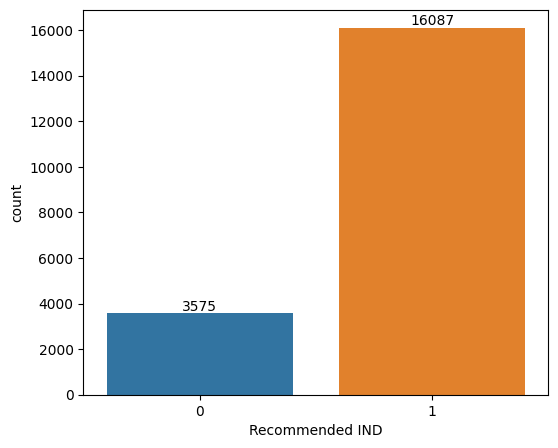

In [ ]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data =df, x = "Recommended IND")
ax.bar_label(ax.containers[0]);
#visualizing the number of the classes.
#customer recommends the product where 1 is recommended, 0 is not recommended.

In [ ]:
df["Recommended IND"].value_counts()

1    16087
0     3575
Name: Recommended IND, dtype: int64

In [ ]:
cat=['Division Name','Department Name','Class Name']

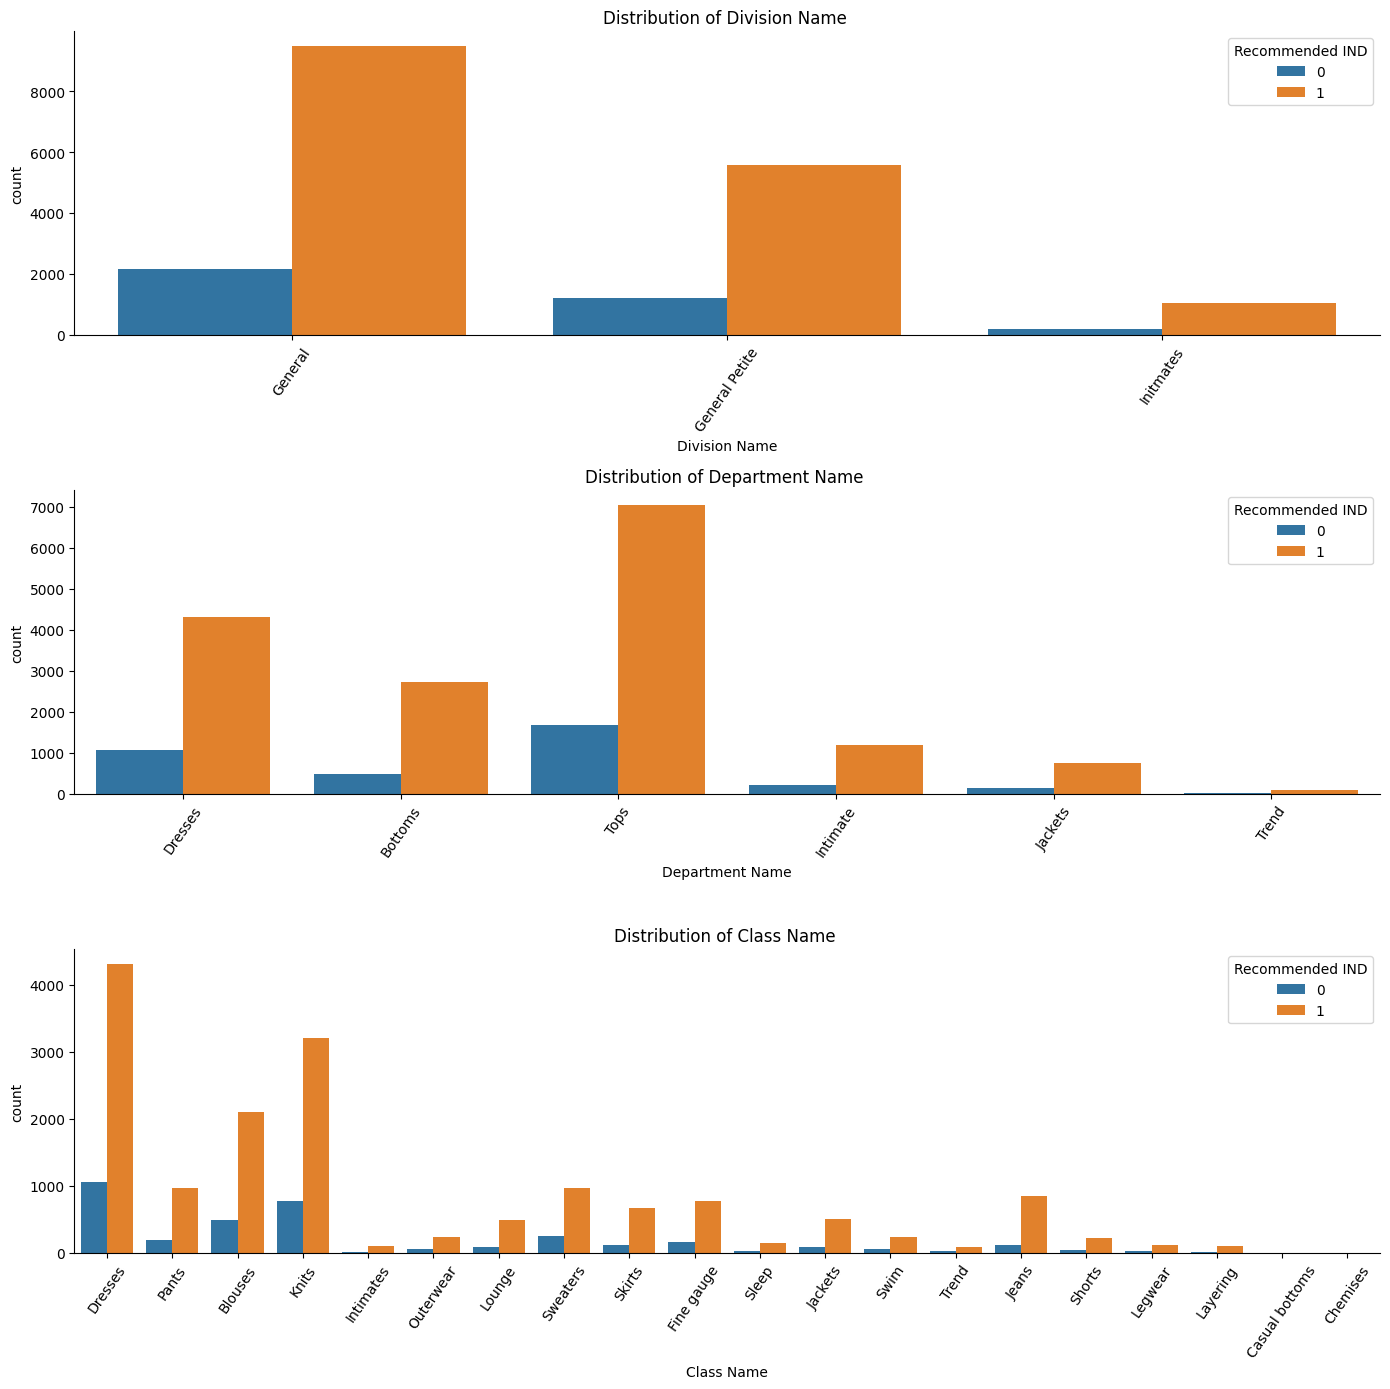

In [ ]:
plt.figure(figsize=[14,14])
n=1
for i in cat:
    plt.subplot(3,1,n)
    sns.countplot(x=df[i],hue =df["Recommended IND"])
    sns.despine()
    plt.title("Distribution of {} ".format(i))
    plt.xticks(rotation=55)
    n=n+1
plt.tight_layout()
plt.show()

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df2 = df.copy()

In [ ]:
df2 =df2[["Review Text", "Recommended IND"]]
df2.head()

,Review Text,Recommended IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


### Missing Value Detection

In [ ]:
# Check for the missing values
df2.isnull().sum()

Review Text        0
Recommended IND    0
dtype: int64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
def cleaning(data):

    #1. Tokenize and lower
    text_tokens = word_tokenize(data.lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    stop_words = set(stopwords.words('english'))
    for i in ["not", "no"]:
        stop_words.remove(i)
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #5. joining
    return " ".join(text_cleaned)

In [ ]:
cleaning_text = df2["Review Text"].apply(cleaning)

In [ ]:
cleaning_text.head()

0    high hope dress really wanted work initially o...
1    love love love jumpsuit fun flirty fabulous ev...
2    shirt flattering due adjustable front tie perf...
3    love tracy reese dress one not petite foot tal...
4    aded basket hte last mintue see would look lik...
Name: Review Text, dtype: object

In [ ]:
df2["Review Text"]

0        I had such high hopes for this dress and reall...
1        I love, love, love this jumpsuit. it's fun, fl...
2        This shirt is very flattering to all due to th...
3        I love tracy reese dresses, but this one is no...
4        I aded this in my basket at hte last mintue to...
                               ...                        
19657    I was very happy to snag this dress at such a ...
19658    It reminds me of maternity clothes. soft, stre...
19659    This fit well, but the top was very see throug...
19660    I bought this dress for a wedding i have this ...
19661    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 19662, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
positive = df2[df2['Recommended IND'] == 1]
positive

,Review Text,Recommended IND
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
4,I aded this in my basket at hte last mintue to...,1
5,"I ordered this in carbon for store pick up, an...",1
6,I love this dress. i usually get an xs but it ...,1
...,...,...
19656,So i wasn't sure about ordering this skirt bec...,1
19657,I was very happy to snag this dress at such a ...,1
19658,"It reminds me of maternity clothes. soft, stre...",1
19660,I bought this dress for a wedding i have this ...,1


In [ ]:
negative = df2[df2['Recommended IND'] == 0]
negative

,Review Text,Recommended IND
0,I had such high hopes for this dress and reall...,0
3,"I love tracy reese dresses, but this one is no...",0
8,Dress runs small esp where the zipper area run...,0
19,"First of all, this is not pullover styling. th...",0
22,"Loved the material, but i didnt really look at...",0
...,...,...
19628,I really wanted to like this dress and was enc...,0
19630,I tried these on because the color is really p...,0
19638,I purchased this for a very good price and i t...,0
19655,I was surprised at the positive reviews for th...,0


### Collect Words (positive and negative separately)

In [ ]:
positive_words = " ".join(positive['Review Text'])
positive_words[:100]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothin"

In [ ]:
negative_words = " ".join(negative['Review Text'])
negative_words[:100]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the pe'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
from wordcloud import WordCloud

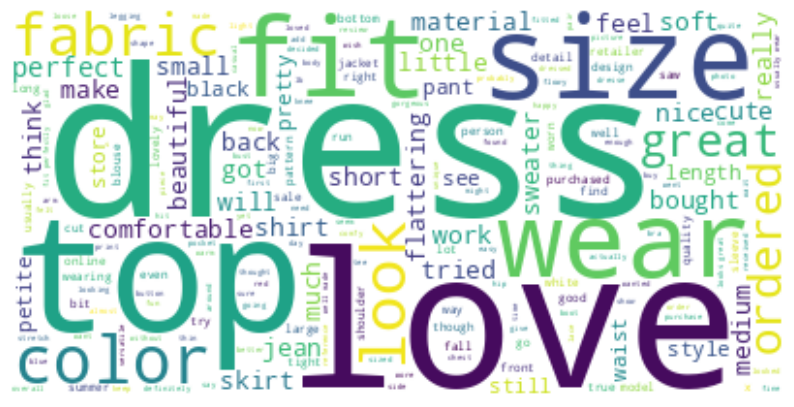

In [ ]:
worldcloud_positive = WordCloud(background_color="white", max_words =250)
worldcloud_positive.generate(positive_words)

# The matplotlib library is used for visualization purposes
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(worldcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

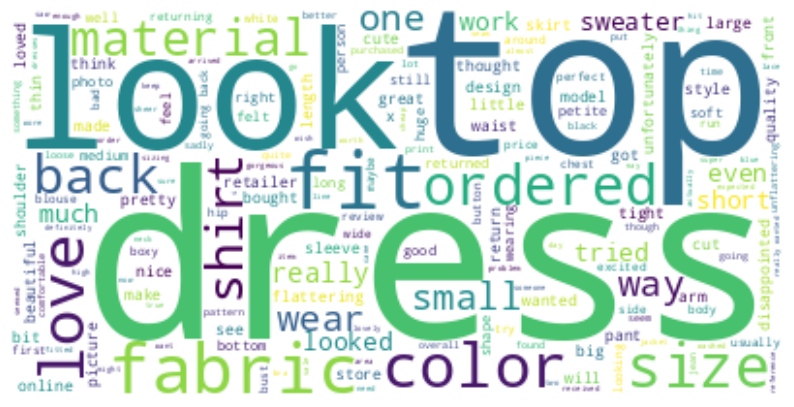

In [ ]:
worldcloud_negative = WordCloud(background_color="white", max_words =250)
worldcloud_negative.generate(negative_words)
 # The matplotlib library is used for visualization purposes
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(worldcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df2["Review Text"]
y = df2["Recommended IND"].map({0:1, 1:0}).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)
# min_df = 3 (Ignore tokens that appear in less than 3 documents (comments) in the corpus).

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,abdomen,ability,able,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,accidental,accidentally,accommodate,...,year,yellow,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,young,younger,youthful,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,abdomen,ability,able,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,accidental,accidentally,accommodate,...,year,yellow,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,young,younger,youthful,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
15725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
15726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
15727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.169986,0.0,0.0,0.0,0.0


### Eval Function

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))


## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C = 0.4, max_iter=1000 , class_weight='balanced')
log_model .fit(X_train_count,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [ ]:
print("Logistic Regression")
eval(log_model , X_train_count, X_test_count)

Logistic Regression
[[2841  377]
 [ 139  576]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      3218
           1       0.60      0.81      0.69       715

    accuracy                           0.87      3933
   macro avg       0.78      0.84      0.80      3933
weighted avg       0.89      0.87      0.88      3933

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     12869
           1       0.70      0.95      0.81      2860

    accuracy                           0.92     15729
   macro avg       0.85      0.93      0.88     15729
weighted avg       0.94      0.92      0.92     15729



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[0]),
            'recall': make_scorer(recall_score, average=None, labels = [0]),
            'f1': make_scorer(f1_score, average=None, labels = [0])}


In [ ]:
# cross_validate
model = LogisticRegression(C = 0.4, max_iter=1000)
scores = cross_validate(model , X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.885879
train_accuracy     0.934389
test_precision     0.912667
train_precision    0.943677
test_recall        0.951588
train_recall       0.978190
test_f1            0.931710
train_f1           0.960624
dtype: float64

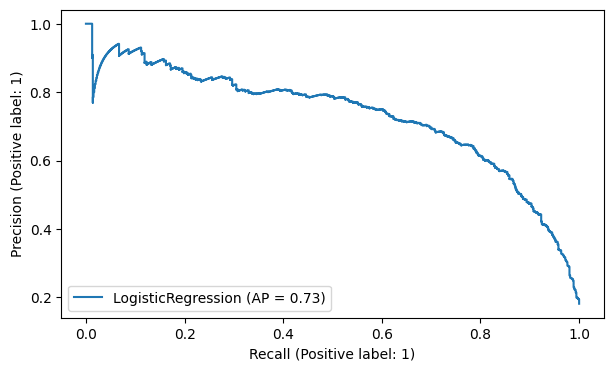

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log_model,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = log_model.predict(X_test_count)
y_pred_proba= log_model.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=0.4, max_iter=1000 , class_weight="balanced")
log_model.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [ ]:
print("Logistic Regression")
eval(log_model, X_train_tf_idf, X_test_tf_idf)

Logistic Regression
[[2783  435]
 [  92  623]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3218
           1       0.59      0.87      0.70       715

    accuracy                           0.87      3933
   macro avg       0.78      0.87      0.81      3933
weighted avg       0.90      0.87      0.88      3933

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     12869
           1       0.61      0.91      0.73      2860

    accuracy                           0.88     15729
   macro avg       0.79      0.89      0.82     15729
weighted avg       0.91      0.88      0.88     15729



In [ ]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model , X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.870939
train_accuracy     0.883909
test_precision     0.876185
train_precision    0.886230
test_recall        0.980884
train_recall       0.984493
test_f1            0.925580
train_f1           0.932781
dtype: float64

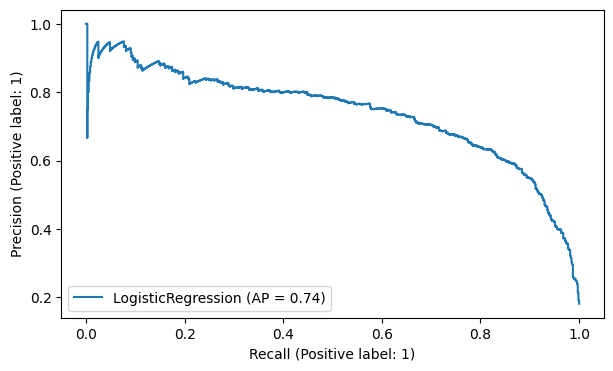

In [ ]:
PrecisionRecallDisplay.from_estimator(log_model,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = log_model.predict(X_test_tf_idf)
y_pred_proba= log_model.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [ ]:
nb_model = MultinomialNB(alpha=2)
nb_model.fit(X_train_count,y_train)

MultinomialNB(alpha=2)

In [ ]:
print("naive_bayes")
eval(nb_model, X_train_count, X_test_count)

naive_bayes
[[2994  224]
 [ 196  519]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3218
           1       0.70      0.73      0.71       715

    accuracy                           0.89      3933
   macro avg       0.82      0.83      0.82      3933
weighted avg       0.89      0.89      0.89      3933

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12869
           1       0.70      0.78      0.74      2860

    accuracy                           0.90     15729
   macro avg       0.82      0.85      0.84     15729
weighted avg       0.90      0.90      0.90     15729



In [ ]:
model = MultinomialNB(alpha=2)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.880157
train_accuracy     0.901357
test_precision     0.934419
train_precision    0.948540
test_recall        0.917942
train_recall       0.929883
test_f1            0.926089
train_f1           0.939118
dtype: float64

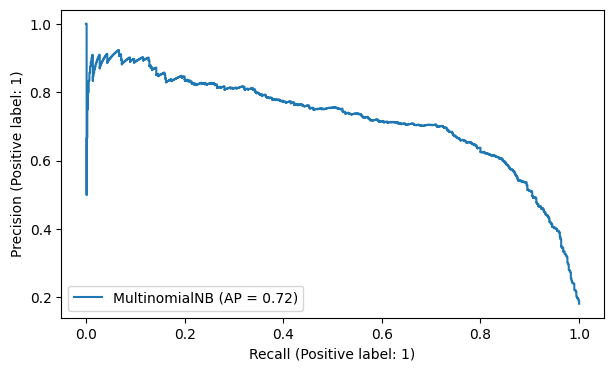

In [ ]:
PrecisionRecallDisplay.from_estimator(nb_model,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = nb_model.predict(X_test_count)
y_pred_proba= nb_model.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
nb_model = BernoulliNB(alpha=0.5)
nb_model.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.5)

In [ ]:
print("naive_bayes")
eval(nb_model, X_train_tf_idf, X_test_tf_idf)

naive_bayes
[[2928  290]
 [ 184  531]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3218
           1       0.65      0.74      0.69       715

    accuracy                           0.88      3933
   macro avg       0.79      0.83      0.81      3933
weighted avg       0.89      0.88      0.88      3933

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     12869
           1       0.69      0.82      0.75      2860

    accuracy                           0.90     15729
   macro avg       0.83      0.87      0.85     15729
weighted avg       0.91      0.90      0.90     15729



In [ ]:
model = BernoulliNB(alpha=0.5)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.877360
train_accuracy     0.902219
test_precision     0.940850
train_precision    0.958823
test_recall        0.907140
train_recall       0.919997
test_f1            0.923669
train_f1           0.939009
dtype: float64

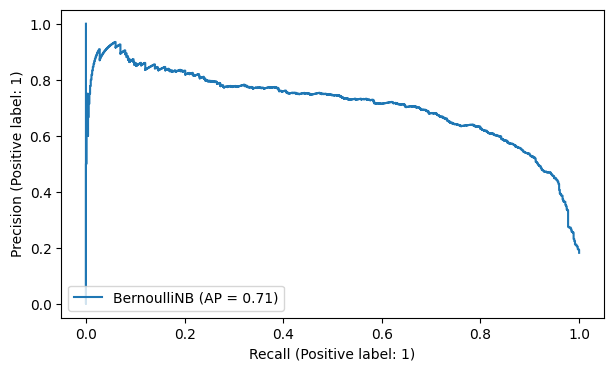

In [ ]:
PrecisionRecallDisplay.from_estimator(nb_model,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = nb_model.predict(X_test_tf_idf)
y_pred_proba= nb_model.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(C=0.01 , class_weight="balanced" , random_state=101)
svc_model.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc_model, X_train_count, X_test_count)

SVC MODEL
[[2816  402]
 [ 121  594]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3218
           1       0.60      0.83      0.69       715

    accuracy                           0.87      3933
   macro avg       0.78      0.85      0.80      3933
weighted avg       0.89      0.87      0.87      3933

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     12869
           1       0.64      0.93      0.76      2860

    accuracy                           0.89     15729
   macro avg       0.81      0.91      0.85     15729
weighted avg       0.92      0.89      0.90     15729



In [ ]:
model = LinearSVC(C=0.01 , class_weight="balanced" , random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.859431
train_accuracy     0.895550
test_precision     0.956956
train_precision    0.982650
test_recall        0.867277
train_recall       0.888017
test_f1            0.909860
train_f1           0.932939
dtype: float64

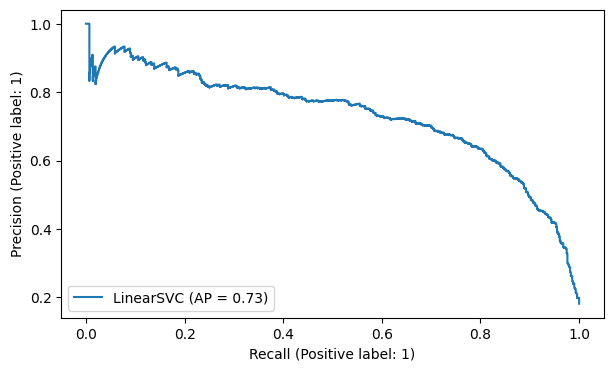

In [ ]:
PrecisionRecallDisplay.from_estimator(svc_model,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = svc_model.predict(X_test_count)
decision_function= svc_model.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [ ]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(C=0.04, class_weight="balanced" , random_state=101)
svc_model.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.04, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc_model, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[2776  442]
 [  91  624]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3218
           1       0.59      0.87      0.70       715

    accuracy                           0.86      3933
   macro avg       0.78      0.87      0.81      3933
weighted avg       0.90      0.86      0.87      3933

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     12869
           1       0.60      0.92      0.73      2860

    accuracy                           0.87     15729
   macro avg       0.79      0.89      0.82     15729
weighted avg       0.91      0.87      0.88     15729



In [ ]:
model = LinearSVC(C=0.04 , class_weight="balanced" , random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.856252
train_accuracy     0.876251
test_precision     0.964063
train_precision    0.979494
test_recall        0.856243
train_recall       0.866898
test_f1            0.906923
train_f1           0.919763
dtype: float64

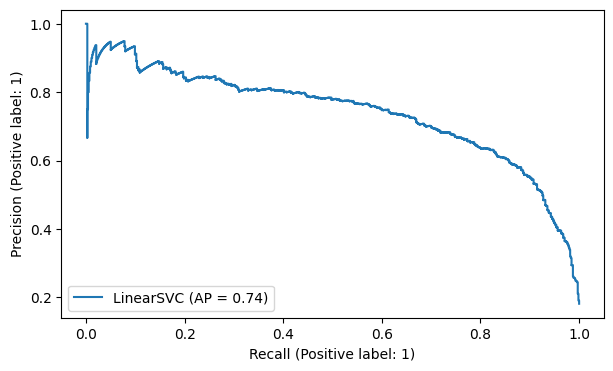

In [ ]:
PrecisionRecallDisplay.from_estimator(svc_model,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = svc_model.predict(X_test_tf_idf)
decision_function= svc_model.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(200, max_depth = 7 , random_state = 42, n_jobs = -1 , class_weight="balanced")
rf_model.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
print("RF MODEL")
eval(rf_model, X_train_count, X_test_count)

RF MODEL
[[2731  487]
 [ 133  582]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3218
           1       0.54      0.81      0.65       715

    accuracy                           0.84      3933
   macro avg       0.75      0.83      0.78      3933
weighted avg       0.88      0.84      0.85      3933

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.91     12869
           1       0.57      0.86      0.68      2860

    accuracy                           0.85     15729
   macro avg       0.76      0.86      0.79     15729
weighted avg       0.89      0.85      0.86     15729



In [ ]:
model = RandomForestClassifier(200, max_depth = 7, random_state = 42, n_jobs = -1 , class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.835908
train_accuracy     0.855871
test_precision     0.951293
train_precision    0.966284
test_recall        0.842566
train_recall       0.853636
test_f1            0.893598
train_f1           0.906456
dtype: float64

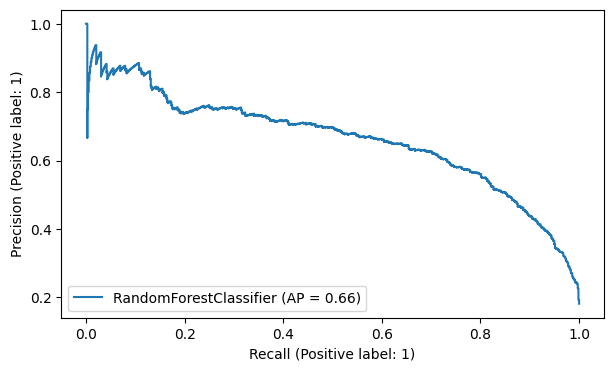

In [ ]:
PrecisionRecallDisplay.from_estimator(rf_model,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = rf_model.predict(X_test_count)
y_pred_proba= rf_model.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
rf_model = RandomForestClassifier(200, max_depth = 7, random_state = 42, n_jobs = -1 , class_weight="balanced")
rf_model.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
print("RF MODEL")
eval(rf_model, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2651  567]
 [ 132  583]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3218
           1       0.51      0.82      0.63       715

    accuracy                           0.82      3933
   macro avg       0.73      0.82      0.75      3933
weighted avg       0.87      0.82      0.84      3933

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     12869
           1       0.54      0.89      0.68      2860

    accuracy                           0.84     15729
   macro avg       0.76      0.86      0.79     15729
weighted avg       0.89      0.84      0.86     15729



In [ ]:
model = RandomForestClassifier(200, max_depth = 7, random_state = 42, n_jobs = -1 , class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.820268
train_accuracy     0.850404
test_precision     0.948212
train_precision    0.970566
test_recall        0.825394
train_recall       0.842723
test_f1            0.882515
train_f1           0.902126
dtype: float64

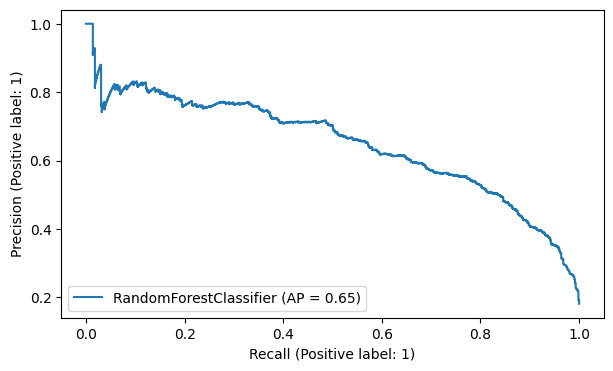

In [ ]:
PrecisionRecallDisplay.from_estimator(rf_model,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = rf_model.predict(X_test_tf_idf)
y_pred_proba= rf_model.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators= 100, random_state = 42)
ada_model.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada_model, X_train_count, X_test_count)

Ada MODEL
[[3054  164]
 [ 364  351]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3218
           1       0.68      0.49      0.57       715

    accuracy                           0.87      3933
   macro avg       0.79      0.72      0.75      3933
weighted avg       0.85      0.87      0.86      3933

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     12869
           1       0.72      0.52      0.60      2860

    accuracy                           0.88     15729
   macro avg       0.81      0.74      0.76     15729
weighted avg       0.87      0.88      0.87     15729



In [ ]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.867315
train_accuracy     0.875594
test_precision     0.893623
train_precision    0.899736
test_recall        0.951044
train_recall       0.954292
test_f1            0.921434
train_f1           0.926210
dtype: float64

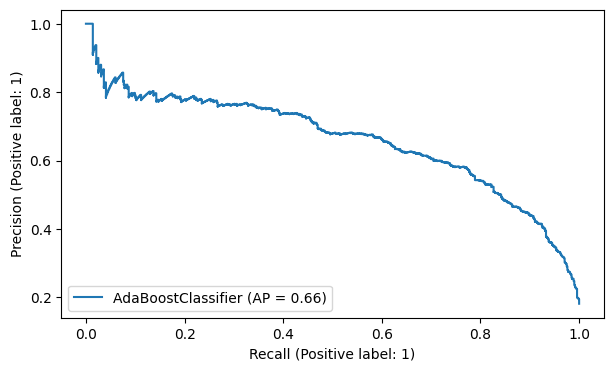

In [ ]:
PrecisionRecallDisplay.from_estimator(ada_model,
                                      X_test_count,
                                      y_test);

In [ ]:
y_pred = ada_model.predict(X_test_count)
y_pred_proba= ada_model.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators= 100, random_state = 42)
ada_model.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada_model, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3061  157]
 [ 349  366]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3218
           1       0.70      0.51      0.59       715

    accuracy                           0.87      3933
   macro avg       0.80      0.73      0.76      3933
weighted avg       0.86      0.87      0.86      3933

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     12869
           1       0.71      0.53      0.61      2860

    accuracy                           0.88     15729
   macro avg       0.81      0.74      0.77     15729
weighted avg       0.87      0.88      0.87     15729



In [ ]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.863309
train_accuracy     0.877466
test_precision     0.893307
train_precision    0.902089
test_recall        0.945916
train_recall       0.953756
test_f1            0.918848
train_f1           0.927202
dtype: float64

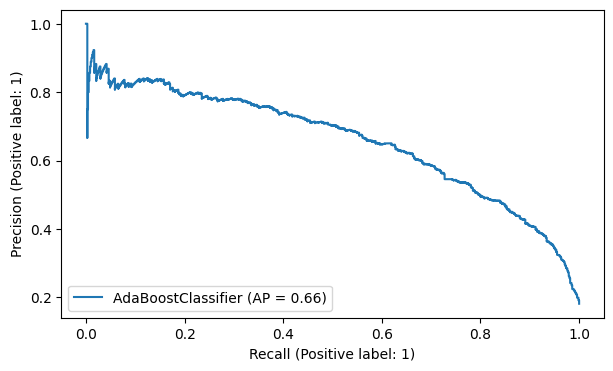

In [ ]:
PrecisionRecallDisplay.from_estimator(ada_model,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = ada_model.predict(X_test_tf_idf)
y_pred_proba= ada_model.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [ ]:
num_words = 10001
#the maximum number of words to keep, based on word frequency.
#only the most common num_words-1 words will be kept.

tokenizer = Tokenizer(num_words=num_words)
#the Tokenizer function separates all texts into word tokens.

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index
#the word_index attribute provides a dictionary of unique identifiers for each word in the corpus.

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'size': 21,
 'love': 22,
 'have': 23,
 'very': 24,
 'fit': 25,
 'top': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'too': 34,
 'great': 35,
 'or': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'at': 43,
 'up': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'one': 55,
 'these': 56,
 'will': 57,
 'flattering': 58,
 'an': 59,
 'well': 60,
 'out': 61,
 'soft': 62,
 '\r': 63,
 'back': 64,
 'because': 65,
 'had': 66,
 'can': 67,
 'nice': 68,
 'comfortable': 69,
 'bought': 70,
 'all': 71,
 'than': 72,
 'when': 73,
 'cute': 74,
 'bit': 75,
 'looks': 76,
 'fits': 77,
 'which': 78,
 'large': 79,
 'b

In [ ]:
len(tokenizer.word_index)
#14244 unique tokens

14244

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)
#texts_to_sequences. Transforms each text in texts to a sequence of integers.
#only top num_words-1 most frequent words will be taken into account.

In [ ]:
X[:2]

0    I had such high hopes for this dress and reall...
1    I love, love, love this jumpsuit. it's fun, fl...
Name: Review Text, dtype: object

In [ ]:
X_num_tokens[:2]

[[2,
  66,
  315,
  178,
  1086,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1170,
  52,
  1,
  91,
  46,
  17,
  234,
  21,
  10,
  2,
  221,
  7,
  8,
  29,
  6424,
  46,
  16,
  46,
  9,
  639,
  20,
  2,
  118,
  19,
  804,
  5,
  44,
  2,
  2152,
  5,
  9,
  91,
  96,
  78,
  15,
  39,
  629,
  251,
  1,
  26,
  653,
  15,
  69,
  3,
  25,
  255,
  10,
  1,
  173,
  653,
  66,
  4,
  24,
  148,
  275,
  467,
  3,
  521,
  736,
  499,
  4399,
  152,
  970,
  1892,
  4,
  1954,
  142,
  1654,
  15,
  1,
  4399,
  152,
  467,
  822,
  3128,
  308,
  1,
  466,
  5,
  673],
 [2,
  22,
  22,
  22,
  7,
  633,
  33,
  282,
  1361,
  3,
  805,
  316,
  184,
  2,
  32,
  5,
  2,
  114,
  522,
  10,
  35,
  215]]

### Maximum number of tokens for all documents¶

In [ ]:
len(X_num_tokens[109])
# The 109th user query consists of 40 tokens.

40

In [ ]:
len(X_num_tokens[106])
# The 106th user query consists of 76tokens.

76

In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens

array([97, 22, 36, ..., 42, 85, 18])

In [ ]:
num_tokens.mean()
#We are taking the average of all lines dimensions.

62.334706540535045

In [ ]:
num_tokens.max()

115

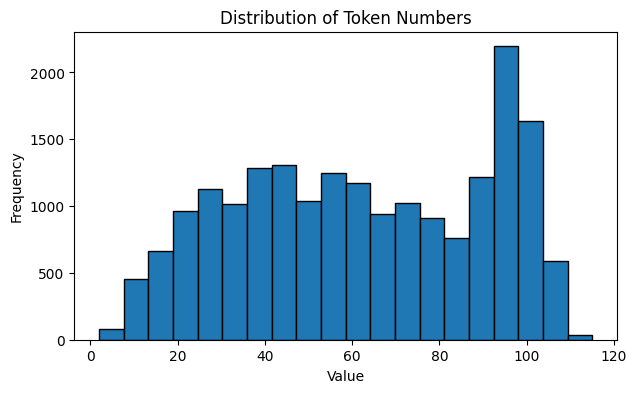

In [ ]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=20, edgecolor='black')
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
max_tokens =115

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

In [ ]:
sum(num_tokens <= max_tokens)

19662

In [ ]:
len(num_tokens)

19662

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [ ]:
X_pad.shape

(19662, 115)

In [ ]:
X_num_tokens[709]

[2,
 195,
 56,
 2124,
 8,
 102,
 16,
 84,
 1,
 45,
 6,
 201,
 10,
 1,
 21,
 2,
 52,
 124,
 25,
 37,
 239,
 4,
 21,
 589,
 9,
 115,
 3,
 2,
 52,
 4,
 21,
 238,
 5,
 15,
 116,
 34,
 148,
 3,
 112,
 31,
 48,
 28,
 2,
 66,
 4,
 2566,
 9,
 1,
 466,
 298,
 19,
 168,
 2,
 195,
 5,
 8,
 29,
 66,
 8,
 267,
 86,
 309]

In [ ]:
len(X_num_tokens[709])

62

In [ ]:
X_pad[709]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    2,  195,
         56, 2124,    8,  102,   16,   84,    1,   45,    6,  201,   10,
          1,   21,    2,   52,  124,   25,   37,  239,    4,   21,  589,
          9,  115,    3,    2,   52,    4,   21,  238,    5,   15,  116,
         34,  148,    3,  112,   31,   48,   28,    2,   66,    4, 2566,
          9,    1,  466,  298,   19,  168,    2,  195,    5,    8,   29,
         66,    8,  267,   86,  309], dtype=int32)

In [ ]:
np.argmax(num_tokens)

4802

In [ ]:
X_pad[4802]

array([   2,   22, 1462,  236,    3,    2,   22,  306,  659,   16,    7,
         55,   15,    4,  523,   12,   31,    2,   66,    5,    9,   17,
       7125,   30,  713,   30,    5,  372,   61,   11,    1,  969,    3,
        261,    2,  221,    5,    9,    1,  105,    3,   66,    8,  177,
          5,   11,    2,  393,    1, 1472,    3,    1, 4263,    8,    1,
        363,  369,   65,    2,  227,    9,  313,    3,    1, 1472,   25,
        167,   16,    2,  911,    5,  137,    4,   53,   75,   79,   51,
          5,   39, 2005,   11,  169,   40,  220,    5,    8,   25,    1,
         85,    6,   35,   34,  108,  376,  488,  338,   17,  386,   37,
        258, 1540,  258,   78,    6,  474,  354,    2,   28,   17,  236,
          8,  402,    2,   92,    1], dtype=int32)

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [ ]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:
model_DL = Sequential()

In [ ]:
embedding_size = 100

In [ ]:
#embedding_laye
model_DL.add(Embedding(input_dim=num_words,
                      output_dim=embedding_size,
                      input_length=max_tokens))
model_DL.add(Dropout(0.2))

model_DL.add(GRU(units=50, return_sequences=True))
model_DL.add(Dropout(0.2))

model_DL.add(GRU(units=25, return_sequences=True))
model_DL.add(Dropout(0.2))

model_DL.add(GRU(units=12, return_sequences=False))#set return_sequences=False because the next layer is a Dense layer.
model_DL.add(Dropout(0.2))

model_DL.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.001)

In [ ]:
model_DL.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['Recall'])

In [ ]:
model_DL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 115, 100)          1000100   
                                                                 
 dropout (Dropout)           (None, 115, 100)          0         
                                                                 
 gru (GRU)                   (None, 115, 50)           22800     
                                                                 
 dropout_1 (Dropout)         (None, 115, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 115, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 115, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 2, restore_best_weights=True)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

# If our data were unbalanced, we could have used sample weights here

array([0.6110996 , 2.75023314])

In [ ]:
model_DL.fit(X_train, y_train, epochs=20, batch_size=128,sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/20
139/139 [==============================] - 28s 156ms/step - loss: 0.5032 - recall: 0.7075 - val_loss: 0.3584 - val_recall: 0.8184
Epoch 2/20
139/139 [==============================] - 20s 142ms/step - loss: 0.3037 - recall: 0.9018 - val_loss: 0.3786 - val_recall: 0.8827
Epoch 3/20
139/139 [==============================] - 20s 144ms/step - loss: 0.2470 - recall: 0.9363 - val_loss: 0.3741 - val_recall: 0.8799
Epoch 4/20
139/139 [==============================] - 20s 141ms/step - loss: 0.2127 - recall: 0.9534 - val_loss: 0.3319 - val_recall: 0.8073
Epoch 4: early stopping


### Model Evaluation

In [ ]:
model_loss = pd.DataFrame(model_DL.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.503199,0.707491,0.358398,0.818436
1,0.303669,0.901772,0.378617,0.882682
2,0.246993,0.936276,0.374147,0.879888
3,0.212656,0.953373,0.331948,0.807263


<Axes: >

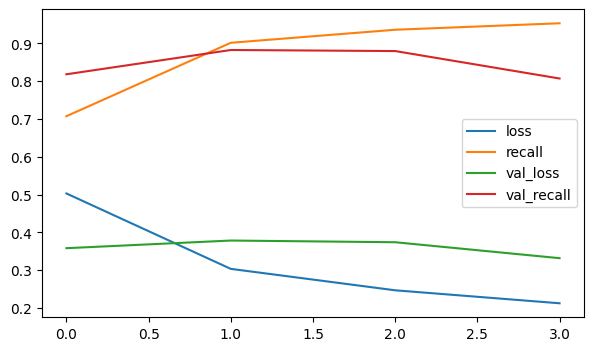

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model_DL.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))


62/62 [==============================] - 2s 25ms/step
[[1339  270]
 [  42  316]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1609
           1       0.54      0.88      0.67       358

    accuracy                           0.84      1967
   macro avg       0.75      0.86      0.78      1967
weighted avg       0.89      0.84      0.85      1967



In [ ]:
y_train_pred = model_DL.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

553/553 [==============================] - 11s 20ms/step
[[12531  1947]
 [   94  3123]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.87      0.92     14478
           1       0.62      0.97      0.75      3217

    accuracy                           0.88     17695
   macro avg       0.80      0.92      0.84     17695
weighted avg       0.92      0.88      0.89     17695



62/62 [==============================] - 1s 21ms/step


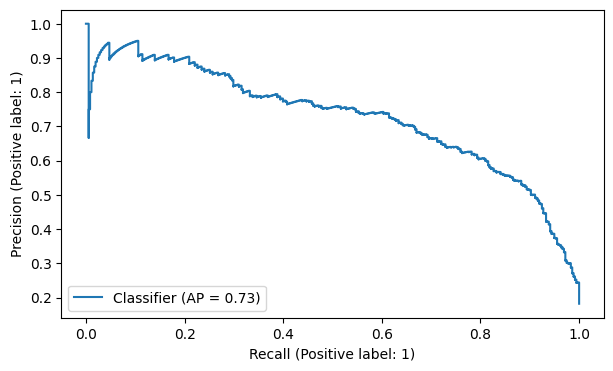

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model_DL.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7277956328648623

In [ ]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [ ]:
!pip install transformers

### Read Data

In [ ]:
df3 = df.copy()
df3.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
X2 = df3['Review Text']
y2 = df3['Recommended IND']

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, stratify=y2, random_state=42)

### Tokenization

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
print(len(tokenizer.vocab))

30522


### Fixing token counts of all documents

In [ ]:
# For every sentence...
number_tokens_sentences = []
for sent in X2:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent, add_special_tokens=True) # we use tokenizer2 for uncased
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))

# We will use the 'tokenizer.encode()' function to find out how many tokens the longest comment consists of and to decide on the number
# of tokens to fix for all documents/texts.

Max sentence length:  162


In [ ]:
np.array(number_tokens_sentences).mean()

79.16580205472485

In [ ]:
token_size = 162
sum(np.array(number_tokens_sentences) < token_size) / len(number_tokens_sentences)

0.9999491404740107

### Transformation Vectors to Matrices

In [ ]:
tokens = tokenizer(list(X2), max_length=162, truncation=True,
                              padding='max_length', add_special_tokens=True)

In [ ]:
np.array(tokens["input_ids"])

array([[ 101, 1045, 2018, ...,    0,    0,    0],
       [ 101, 1045, 2293, ...,    0,    0,    0],
       [ 101, 2023, 3797, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [ ]:
np.array(tokens["attention_mask"])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
def transformation(X2):
  # set array dimensions
  seq_len = 162

  tokens = tokenizer(list(X2),
           max_length=seq_len,
           truncation=True,
           padding='max_length',
           add_special_tokens=True)

  return np.array(tokens['input_ids']), np.array(tokens['attention_mask'])

In [ ]:
#creating 2 separate matrices for our training set and  test set .
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [ ]:
Xids_train

array([[ 101, 1045, 3062, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2074, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 2003, ...,    0,    0,    0],
       [ 101, 1045, 5078, ...,    0,    0,    0],
       [ 101, 2023, 2003, ...,    0,    0,    0]])

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (17695, 162)
Xmask_train.shape : (17695, 162)
Xids_test.shape   : (1967, 162)
Xmask_test.shape  : (1967, 162)


In [ ]:
y_train2

16360    1
13738    1
15337    1
6971     1
11355    0
        ..
5583     1
15380    1
19278    1
14249    1
2785     1
Name: Recommended IND, Length: 17695, dtype: int64

In [ ]:
labels_train = np.array(y_train2).reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
labels_test = np.array(y_test2).reshape(-1,1)
labels_test

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

### Transformation Matrix to Tensorflow tensor

In [ ]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [ ]:
# use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [ ]:
batch_size = 16
# The developers who developed the BERT model recommend using batch sizes of 16 and 32.
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [ ]:
!pip install -q tf-models-official

In [ ]:
len(X_train2)

17695

In [ ]:
from official.nlp import optimization
epochs = 5
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

2212
221


### Creating Model with TPU

In [ ]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  recall = Recall()
  model_bert = create_model()
  model_bert.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
model_bert.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 162)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 162)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 162, 7                                     

### Model Fiting

In [ ]:
model_bert.fit(train_ds ,
               validation_data= val_ds ,
               epochs=epochs)

Epoch 1/5
1106/1106 [==============================] - 102s 92ms/step - loss: 0.3313 - recall_9: 0.9900 - val_loss: 0.5856 - val_recall_9: 0.9347
Epoch 2/5
1106/1106 [==============================] - 98s 89ms/step - loss: 0.3207 - recall_9: 0.9909 - val_loss: 0.5538 - val_recall_9: 0.9391
Epoch 3/5
1106/1106 [==============================] - 96s 87ms/step - loss: 0.3231 - recall_9: 0.9893 - val_loss: 0.5535 - val_recall_9: 0.9391
Epoch 4/5
1106/1106 [==============================] - 97s 88ms/step - loss: 0.3222 - recall_9: 0.9903 - val_loss: 0.5538 - val_recall_9: 0.9391
Epoch 5/5
1106/1106 [==============================] - 96s 87ms/step - loss: 0.3222 - recall_9: 0.9904 - val_loss: 0.5541 - val_recall_9: 0.9391


### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model_bert.history.history)
model_loss.head()

,loss,recall_9,val_loss,val_recall_9
0,0.331339,0.989985,0.585590,0.934742
1,0.320659,0.990883,0.553802,0.939093
2,0.323147,0.989294,0.553523,0.939093
3,0.322211,0.990330,0.553795,0.939093
4,0.322233,0.990399,0.554150,0.939093


<Axes: >

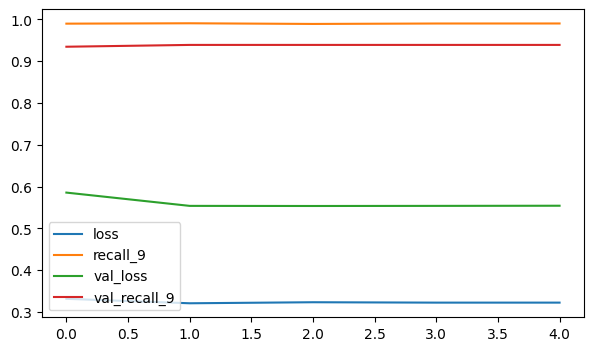

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_bert.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

123/123 [==============================] - 4s 22ms/step
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       358
           1       0.96      0.94      0.95      1609

    accuracy                           0.91      1967
   macro avg       0.85      0.87      0.86      1967
weighted avg       0.92      0.91      0.92      1967



In [ ]:
y_train_pred = model_bert.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

1106/1106 [==============================] - 24s 21ms/step
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3217
           1       0.98      0.99      0.99     14478

    accuracy                           0.98     17695
   macro avg       0.97      0.96      0.96     17695
weighted avg       0.98      0.98      0.98     17695



123/123 [==============================] - 6s 24ms/step


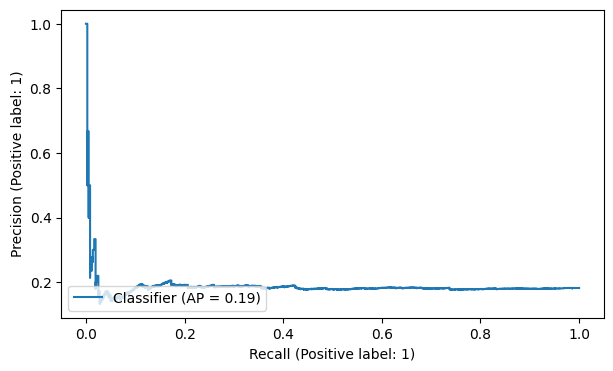

In [ ]:
y_pred_proba = model_bert.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
average_precision_score(y_test2, y_pred_proba)

0.9787580579300555

In [ ]:
BERT_AP = average_precision_score(y_test2, y_pred_proba)
BERT_f1 = f1_score(y_test2, y_pred)
BERT_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
svc_count_f1

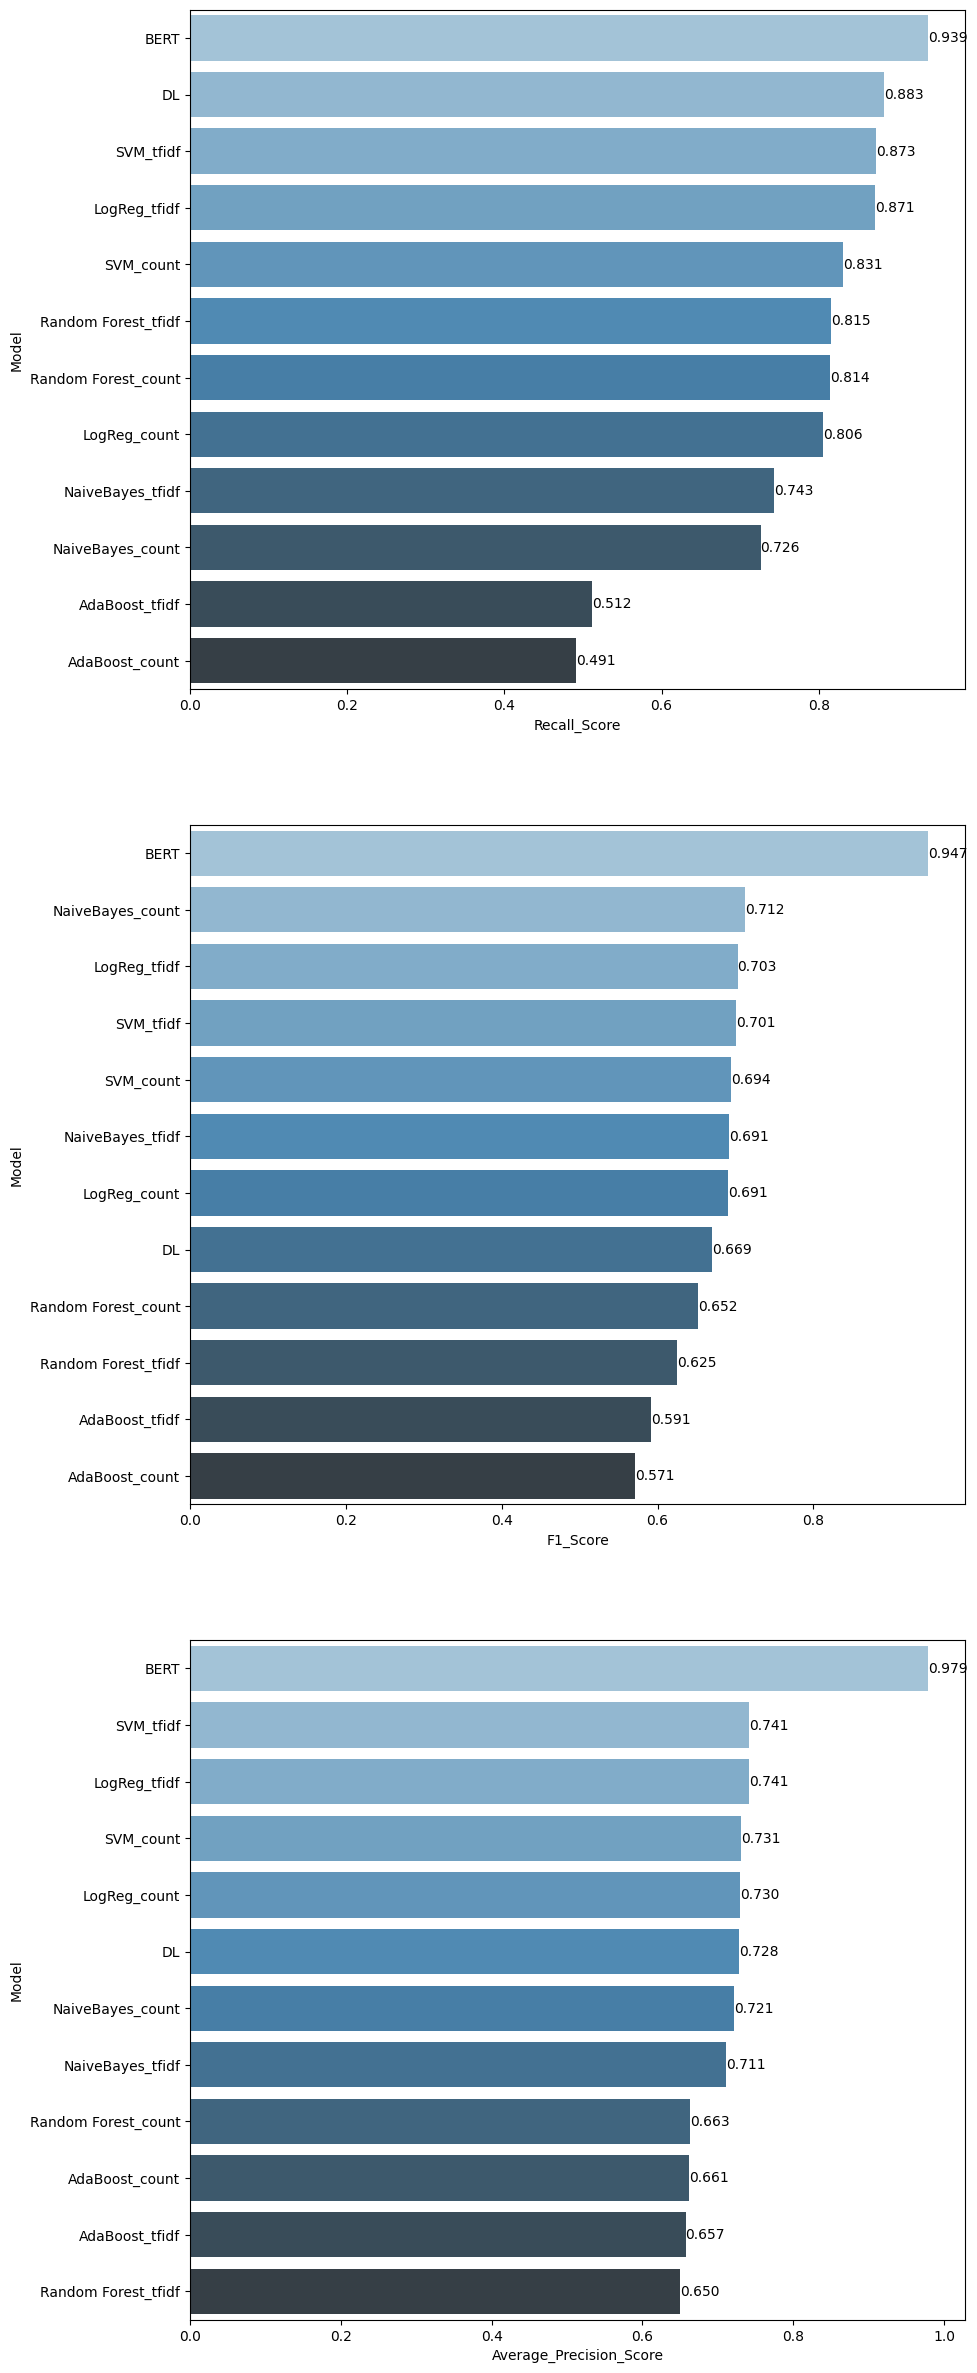

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT"],

                        "F1_Score": [nb_count_f1, log_count_f1,svc_count_f1 , rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1,
                                     BERT_f1
                                     ],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec,
                                         BERT_rec
                                         ],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP,
                                                    BERT_AP
                                                    ]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___